In [2]:
%run "..\data_cleaning\data_preprocessing.ipynb"

In [3]:
df = pd.read_csv("s3://data3001-racing/track_ratio.csv",index_col=0)
# this column is 1 if the point is on the track and 0 if it is not 
df["point_on_track"] = np.where(df["track_ratio_left"]+df["track_ratio_right"]<1.1, 1, 0)

In [4]:
left_df = clean_left()
right_df = clean_right()

In [6]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,...,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right,point_on_track
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,...,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)",116.088814,467.188385,105.453957,458.697906,13.608395,0.253946,0.747648,1
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,...,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)",118.381073,464.983765,109.808960,454.497711,13.543945,0.248483,0.751813,1
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,...,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)",121.621696,462.068420,112.191628,452.203156,13.647331,0.256241,0.744023,1
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,...,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)",124.038795,459.542725,114.978645,449.522491,13.508938,0.248865,0.753349,1
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,...,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)",127.842636,455.882050,117.375343,447.220856,13.586041,0.247416,0.753868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278104,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,...,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)",595.011292,-159.184097,587.880310,-165.738083,9.685330,0.757178,0.260534,1
278105,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,...,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)",597.092346,-161.747345,589.733826,-168.052902,9.690608,0.758692,0.241942,1
278106,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,...,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)",599.169495,-164.320892,592.514099,-171.548004,9.824736,0.756384,0.243653,1
278107,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,...,"(599.1694946289062, -164.32089233398438)","(594.6680908203125, -174.28103637695312)",599.169495,-164.320892,594.668091,-174.281036,10.930101,0.818635,0.218555,1


In [22]:
filtered_df = df[(df["WORLDPOSX"] < 500) & (df["WORLDPOSX"] > 200) & (df["WORLDPOSY"] > -100)]
filtered_df = filtered_df[filtered_df["point_on_track"]==1]

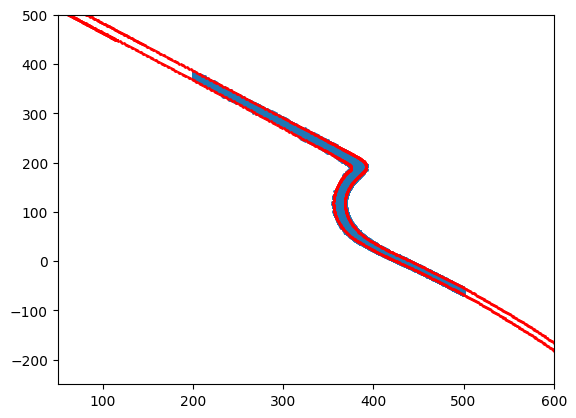

In [29]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], alpha=1,s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(50, 600)
plt.ylim(-250, 500)
plt.show()

### Coordinate positions
- entry: x[200,350], y[200,400]
- inside: x[350,400], y[0,250]
- exit: x[400,500], y[-100,100]

In [8]:
import matplotlib.patches as patches

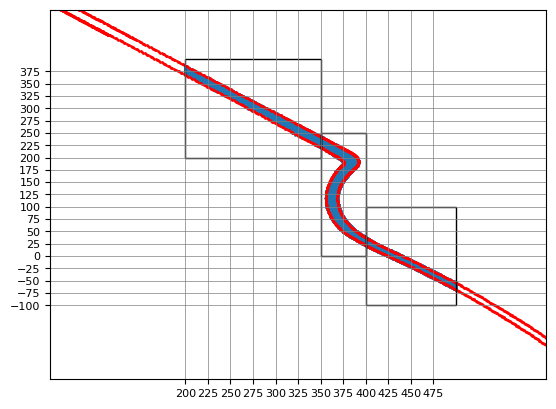

In [23]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], alpha=1,s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')

x1, x2 = 200,350
y1, y2 = 200,400
box = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(box)

x1, x2 = 350,400
y1, y2 = 0,250 
box = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(box)

x1, x2 = 400,500
y1, y2 = -100,100
box = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(box)

plt.xlim(50, 600)
plt.ylim(-250, 500)

plt.grid(True, color='gray', linewidth=0.5)

plt.xticks(range(200, 500, 25),fontsize=8)
plt.yticks(range(-100, 400, 25),fontsize=8)

plt.show()

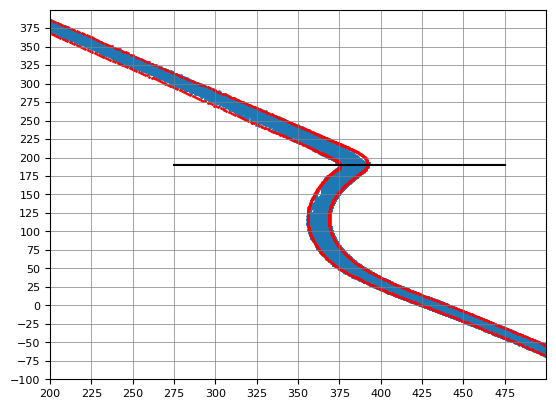

In [157]:
plt.scatter(filtered_df["WORLDPOSX"], filtered_df["WORLDPOSY"], alpha=1,s=1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(200, 500)
plt.ylim(-100, 400)


# Testing space, for the lines
m = 0
b = 190
x = np.linspace(275, 475, 100)
y = m * x + b
plt.plot(x, y, c="black")



plt.grid(True, color='gray', linewidth=0.5)
plt.xticks(range(200, 500, 25),fontsize=8)
plt.yticks(range(-100, 400, 25),fontsize=8)

plt.show()

In [158]:
y1 = 4*x-1150
y2 = 4*x-1182.5
y3 = 4*x-1215
y4 = 4*x-1247.5
y5 = 4*x-1280
y6 = 1.7*x-450
y7 = 0*x+190
y8 = -0.975*x+550
y9 = -0.975*x+535
y10 = -0.975*x+520
y11 = -0.975*x+505
y12 = -0.975*x+490
y13 = 0*x+125
y14 = 0*x+112.5
y15 = 0*x+100
y16 = 0.9*x-240
y17 = 0.9*x-250
y18 = 1*x-295
y19 = 1*x-305
y20 = 1.7*x-587
y21 = 1.7*x-598.5
y22 = 1.7*x-610
y23 = 4*x-1550
y24 = 4*x-1575
y25 = 4*x-1600

(-100.0, 400.0)

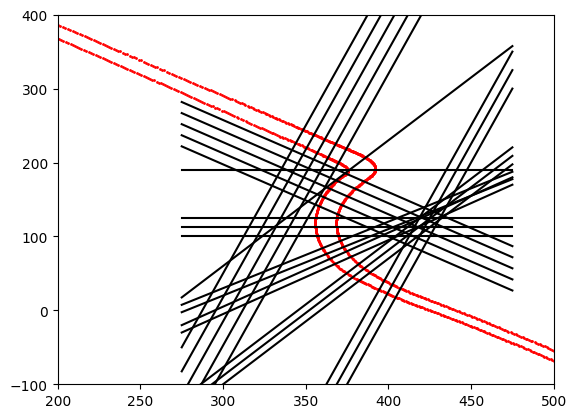

In [159]:
x = np.linspace(275, 475, 100)
plt.plot(x, y1,c='black', label='y1')
plt.plot(x, y2,c='black', label='y2')
plt.plot(x, y3,c='black', label='y3')
plt.plot(x, y4,c='black', label='y4')
plt.plot(x, y5,c='black', label='y5')
plt.plot(x, y6,c='black', label='y6')
plt.plot(x, y7,c='black', label='y7')
plt.plot(x, y8,c='black', label='y8')
plt.plot(x, y9,c='black', label='y9')
plt.plot(x, y10,c='black', label='y10')
plt.plot(x, y11,c='black', label='y11')
plt.plot(x, y12,c='black', label='y12')
plt.plot(x, y13,c='black', label='y13')
plt.plot(x, y14,c='black', label='y14')
plt.plot(x, y15,c='black', label='y15')
plt.plot(x, y16,c='black', label='y16')
plt.plot(x, y17,c='black', label='y17')
plt.plot(x, y18,c='black', label='y18')
plt.plot(x, y19,c='black', label='y19')
plt.plot(x, y20,c='black', label='y20')
plt.plot(x, y21,c='black', label='y21')
plt.plot(x, y22,c='black', label='y22')
plt.plot(x, y23,c='black', label='y23')
plt.plot(x, y24,c='black', label='y24')
plt.plot(x, y25,c='black', label='y25')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.xlim(200, 500)
plt.ylim(-100, 400)

### Sample Code

In [ ]:
import pandas as pd

# Sample data in a DataFrame
data = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y': [2, 3, 5, 4, 6, 8, 7, 9, 11, 12]}

df = pd.DataFrame(data)

# Define the diagonal line equation parameters
m = 1  # Slope of the line
b = 1  # Y-intercept of the line

# Split the data into two DataFrames
above_line = df[df['y'] > (m * df['x'] + b)]
below_line = df[df['y'] <= (m * df['x'] + b)]

# Display the split DataFrames
print("Data points above the line:")
print(above_line)

print("\nData points below the line:")
print(below_line)
